# UBER REQUEST DATA CASE STUDY

### By: Arsh Dinesh Vijayvargiya 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### I. Data Inspection

In [2]:
Uber = pd.read_csv("Uber Request Data.csv")

In [3]:
Uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
Uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


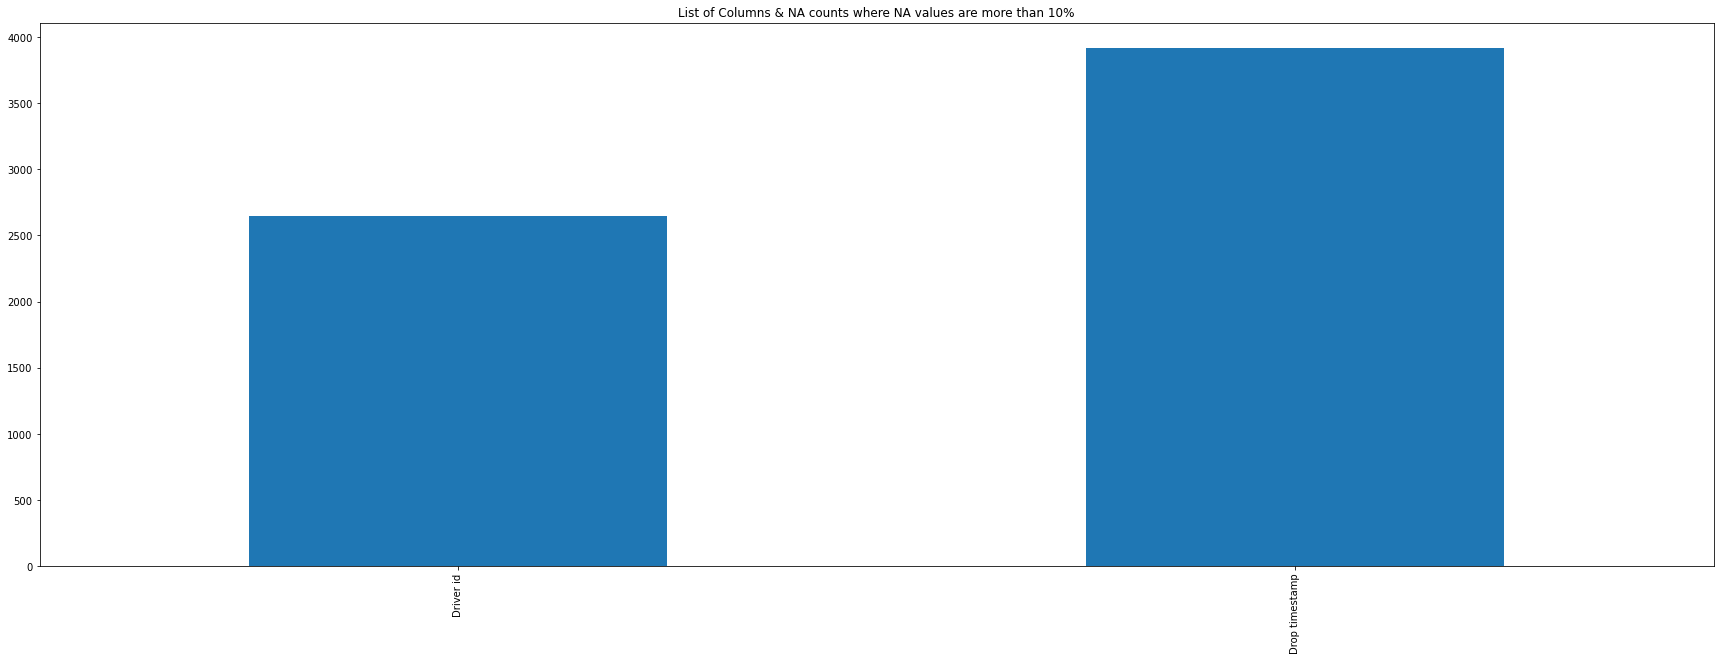

In [5]:
NA_col = Uber.isnull().sum()
NA_col = NA_col[NA_col.values >(0.1*len(Uber))]
plt.figure(figsize=(30,10))
NA_col.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 10%')
plt.show()

------
### II. Data Manipulation

In [6]:
Uber.Status.unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [7]:
Uber_drop = Uber[Uber.Status == 'Cancelled']
Uber_drop.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
2831,2905,City,1.0,Cancelled,13-07-2016 06:08:41,NaN
2832,4805,City,1.0,Cancelled,14-07-2016 17:07:58,NaN
2833,5202,Airport,1.0,Cancelled,14-07-2016 20:51:37,NaN
2834,5927,City,1.0,Cancelled,15-07-2016 10:12:40,NaN
2835,2347,Airport,2.0,Cancelled,12/7/2016 19:14,NaN


In [8]:
Uber_drop_1 = Uber[Uber.Status == 'No Cars Available']
Uber_drop_1.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
4095,1362,City,NaN,No Cars Available,11/7/2016 0:02,NaN
4096,1364,City,NaN,No Cars Available,11/7/2016 0:06,NaN
4097,1366,City,NaN,No Cars Available,11/7/2016 0:09,NaN
4098,2,Airport,NaN,No Cars Available,11/7/2016 0:23,NaN
4099,7,Airport,NaN,No Cars Available,11/7/2016 0:30,NaN


##### Insight: It is observed that for cancelled and no availability the drop timestamp is NaN and as for Driver id whenever there is no cars available the value is NaN. But since these columns aren't much helpfull in our analysis we will simply drop these 

In [9]:
Uber.drop(["Driver id","Drop timestamp","Request id"], axis = 1, inplace = True)

In [10]:
Uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pickup point       6745 non-null   object
 1   Status             6745 non-null   object
 2   Request timestamp  6745 non-null   object
dtypes: object(3)
memory usage: 158.2+ KB


--------

### III. Derived Matrices

In [11]:
Uber["Req_hour"] = pd.to_datetime(Uber["Request timestamp"]).dt.hour
Uber.head()

,Pickup point,Status,Request timestamp,Req_hour
0,Airport,Trip Completed,11/7/2016 11:51,11
1,Airport,Trip Completed,11/7/2016 17:57,17
2,City,Trip Completed,12/7/2016 9:17,9
3,Airport,Trip Completed,12/7/2016 21:08,21
4,City,Trip Completed,13-07-2016 08:33:16,8


In [12]:
period_labels = ['late night', 'early morning','morning','afternoon', 'evening','night']
Uber['Time Period'] = pd.cut(Uber.Req_hour,[-1,4,8,12,16,20,24],labels = period_labels)
Uber.head()

,Pickup point,Status,Request timestamp,Req_hour,Time Period
0,Airport,Trip Completed,11/7/2016 11:51,11,morning
1,Airport,Trip Completed,11/7/2016 17:57,17,evening
2,City,Trip Completed,12/7/2016 9:17,9,morning
3,Airport,Trip Completed,12/7/2016 21:08,21,night
4,City,Trip Completed,13-07-2016 08:33:16,8,early morning


----------------------
### IV. *Analysis*


First we begin our Analysis with checking the frequency of status for different Time Periods.

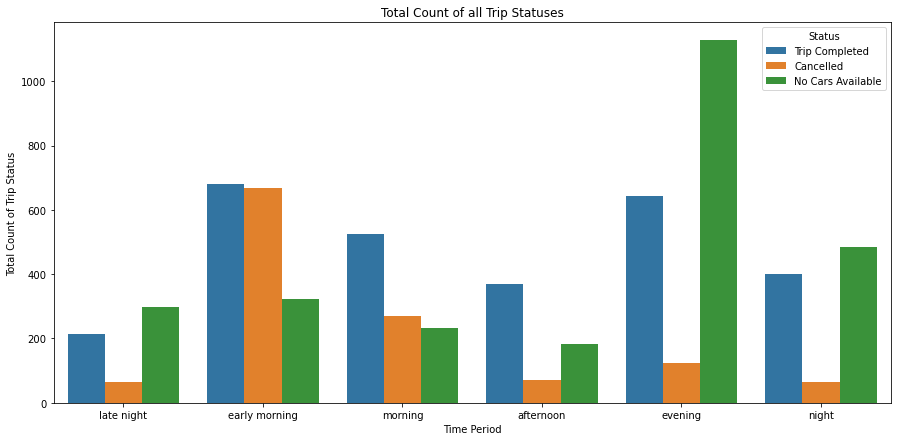

In [13]:
fig, axes = plt.subplots(figsize = (15,7))
axes = sns.countplot(data = Uber,x = 'Time Period', order= period_labels, hue = 'Status')
plt.title('Total Count of all Trip Statuses')
plt.xlabel('Time Period')
plt.ylabel('Total Count of Trip Status')
plt.show()

Observations:
1. Maximum of ***'No Cars Available'***  status is seen in ***evening***  time slot (i.e. 4:00 pm to 8:00 pm) followed by ***night***  time slot.
2. Maximum of ***'Cancelled'***  status of rides is seen in ***early morning***  time slot (i.e. 4:00 am to 8:00 am).

#### *For next we will see when and what route has Cancelled ride Status*

In [14]:
Uber_Cancelled =  Uber[Uber.Status.str.contains("Cancelled") == True]
Uber_Cancelled.head()

,Pickup point,Status,Request timestamp,Req_hour,Time Period
2831,City,Cancelled,13-07-2016 06:08:41,6,early morning
2832,City,Cancelled,14-07-2016 17:07:58,17,evening
2833,Airport,Cancelled,14-07-2016 20:51:37,20,evening
2834,City,Cancelled,15-07-2016 10:12:40,10,morning
2835,Airport,Cancelled,12/7/2016 19:14,19,evening


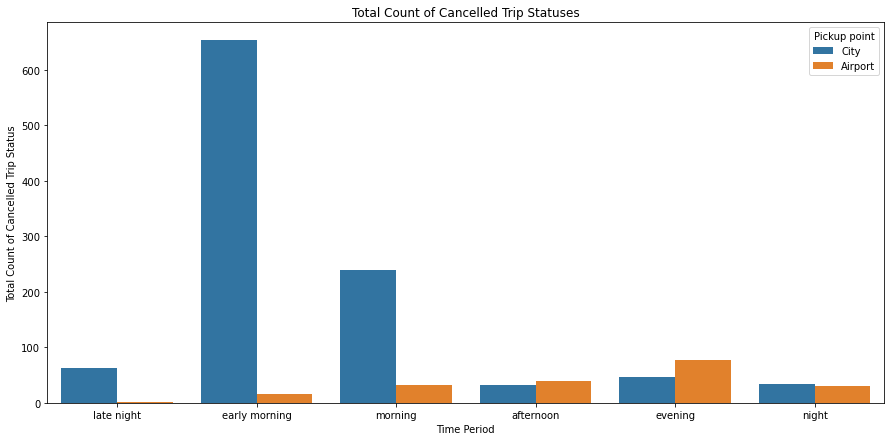

In [15]:
fig, axes = plt.subplots(figsize = (15,7))
axes = sns.countplot(data = Uber_Cancelled,x = 'Time Period', order= period_labels, hue = 'Pickup point')
plt.title('Total Count of Cancelled Trip Statuses')
plt.xlabel('Time Period')
plt.ylabel('Total Count of Cancelled Trip Status')
plt.show()

##### Insight: 
Trips Cancellation is more frequent in ***early morning*** [4:00 - 8:00] for ride from ***city to airport***, and in ***evening*** [16:00 - 20:00] for ride ***airport to city***.

##### Simillarly, we will see it for 'NO CARS AVAILABLE' Status.

In [16]:
Uber_no_car = Uber[Uber.Status.str.contains("No Cars Available") == True]
Uber_no_car.head()

,Pickup point,Status,Request timestamp,Req_hour,Time Period
4095,City,No Cars Available,11/7/2016 0:02,0,late night
4096,City,No Cars Available,11/7/2016 0:06,0,late night
4097,City,No Cars Available,11/7/2016 0:09,0,late night
4098,Airport,No Cars Available,11/7/2016 0:23,0,late night
4099,Airport,No Cars Available,11/7/2016 0:30,0,late night


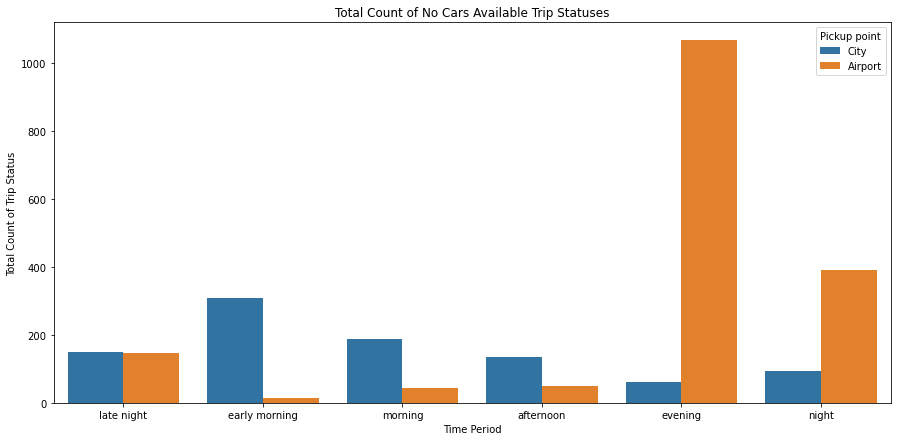

In [17]:
fig, axes = plt.subplots(figsize = (15,7))
axes = sns.countplot(data = Uber_no_car,x = 'Time Period', order= period_labels, hue = 'Pickup point')
plt.title('Total Count of No Cars Available Trip Statuses')
plt.xlabel('Time Period')
plt.ylabel('Total Count of Trip Status')
plt.show()

##### Insight:
In ***evening*** [16:00-20:00] time from airport to city there are no cars available most of the time, whereas for city to airport rides it is ***early morning*** time period [4:00-8:00]. 

----
Let us try to understand the demand and supply curve by taking all completed rides as ***Supply*** and 'cancelled' and 'no cars available' as ***Demand***.

In [18]:
Uber['Sup_or_Dem'] = ['Supply' if x == 'Trip Completed' else 'Demand' for x in Uber.Status]
Uber.head()

,Pickup point,Status,Request timestamp,Req_hour,Time Period,Sup_or_Dem
0,Airport,Trip Completed,11/7/2016 11:51,11,morning,Supply
1,Airport,Trip Completed,11/7/2016 17:57,17,evening,Supply
2,City,Trip Completed,12/7/2016 9:17,9,morning,Supply
3,Airport,Trip Completed,12/7/2016 21:08,21,night,Supply
4,City,Trip Completed,13-07-2016 08:33:16,8,early morning,Supply


Plotting Demand and Supply curve with each route

In [19]:
# Plotting for route city to airport
city_to_airport = Uber[Uber['Pickup point'].str.contains("City")==True]

city_to_airport.head()

,Pickup point,Status,Request timestamp,Req_hour,Time Period,Sup_or_Dem
2,City,Trip Completed,12/7/2016 9:17,9,morning,Supply
4,City,Trip Completed,13-07-2016 08:33:16,8,early morning,Supply
8,City,Trip Completed,15-07-2016 17:57:27,17,evening,Supply
9,City,Trip Completed,11/7/2016 6:46,6,early morning,Supply
11,City,Trip Completed,12/7/2016 12:30,12,morning,Supply


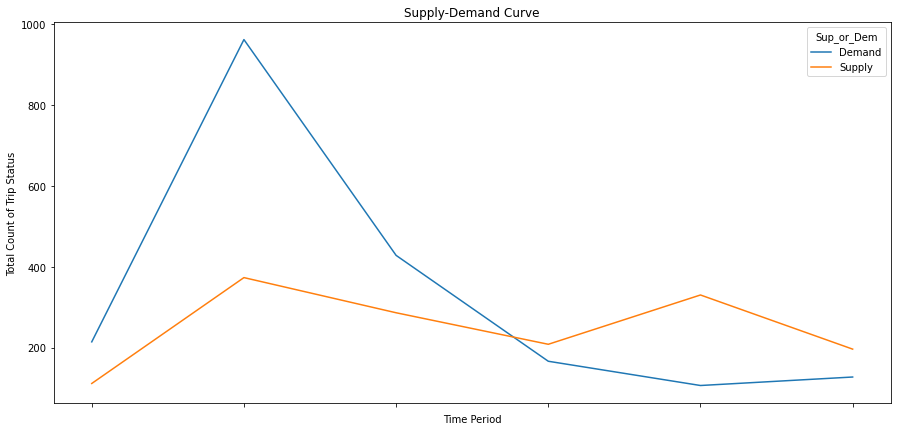

In [20]:
city_to_airport.groupby(['Time Period','Sup_or_Dem']).Sup_or_Dem.count().unstack().plot.line(legend = True, figsize = (15,7))
plt.title('Supply-Demand Curve')
plt.xlabel('Time Period')
plt.ylabel('Total Count of Trip Status')
plt.show()

##### Insight: We can observe that in early morning there is high demand but supply is very low  and on the other hand in evening there is high supply of rides for evening while demand is quite low for route city to airport .

Simillarly, for route airport to city.

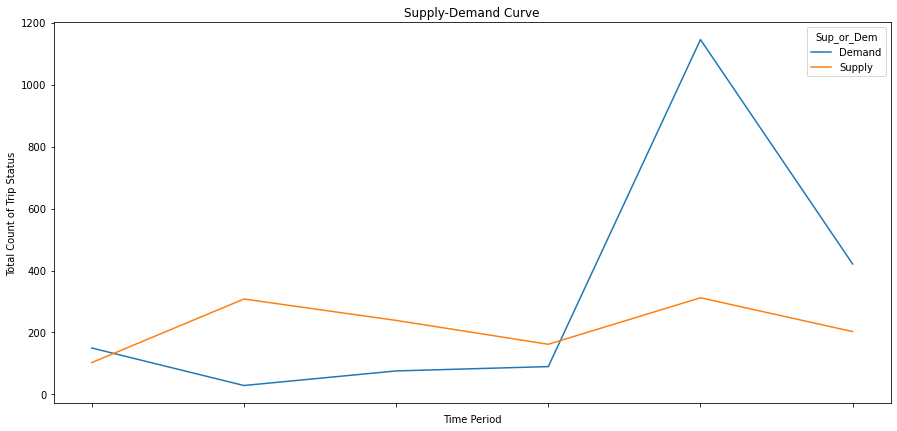

In [21]:
# Plotting for route airport to city
airport_to_city = Uber[Uber['Pickup point'].str.contains("Airport")==True]
airport_to_city.groupby(['Time Period','Sup_or_Dem']).Sup_or_Dem.count().unstack().plot.line(legend = True, figsize = (15,7))
plt.title('Supply-Demand Curve')
plt.xlabel('Time Period')
plt.ylabel('Total Count of Trip Status')
plt.show()  

##### Insight: We can observe that in evening there is high demand but supply is very low  and on the other hand in early morning there is high supply of rides while demand is quite low for route airport to city.

-------

### V. Conclusion
Correlating these two plots, a possible hypothesis could be:
1. The demand during morning and afternoon hours from the Airport to City is quite low, which means that a driver who completed a City to Airport route in the morning hours may have to wait a really long time to get a ride back to the City, or he may have to come back without a passenger. Both situations are not idle for drivers, which might be the reason for highest number of "Cancelled" trips in the City to Airport trip in the morning hours


2. The vice versa happens in evening when there are too many flight coming in to the airport and hence there is a high demand for cabs and not enough supply. which is why most number of "No Cars Available" were observed in Evening in the Airport to City route.